In [1]:
#Objectives
#1. Total Revenue
#2. Avg order value
#3. discount impact
#4. high value transactions
#5. sales distribution
#6. correlation analysis

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv("amazon_sales_dataset.csv")

In [11]:
df.head()
df.info()
df.shape
df.columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        10000 non-null  object 
 1   order_date      10000 non-null  object 
 2   ship_date       10000 non-null  object 
 3   delivery_date   10000 non-null  object 
 4   order_status    10000 non-null  object 
 5   customer_id     10000 non-null  object 
 6   customer_name   10000 non-null  object 
 7   country         10000 non-null  object 
 8   state           10000 non-null  object 
 9   city            10000 non-null  object 
 10  product_id      10000 non-null  object 
 11  product_name    10000 non-null  object 
 12  category        10000 non-null  object 
 13  sub_category    10000 non-null  object 
 14  brand           10000 non-null  object 
 15  quantity        10000 non-null  int64  
 16  unit_price      10000 non-null  float64
 17  discount        10000 non-null  

,quantity,unit_price,discount,shipping_cost,total_sales
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.01440,25126.511133,0.149968,85.053192,64212.910555
std,1.42035,14343.922332,0.086828,37.575284,50992.635082
min,1.00000,214.200000,0.000000,20.010000,309.939600
25%,2.00000,12657.827500,0.070000,52.507500,24037.196775
50%,3.00000,24880.490000,0.150000,84.995000,50287.177500
75%,4.00000,37544.640000,0.220000,117.680000,93417.891825
max,5.00000,49981.880000,0.300000,149.950000,249155.530000


In [12]:
#data cleaning
df.columns = df.columns.str.strip()

In [13]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
delivery_date     0
order_status      0
customer_id       0
customer_name     0
country           0
state             0
city              0
product_id        0
product_name      0
category          0
sub_category      0
brand             0
quantity          0
unit_price        0
discount          0
shipping_cost     0
total_sales       0
payment_method    0
dtype: int64

In [15]:
df['total_sales'].fillna(df['total_sales'].mean(),inplace=True)

C:\Users\ABI\AppData\Local\Temp\ipykernel_3812\2672735888.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_sales'].fillna(df['total_sales'].mean(),inplace=True)


In [16]:
df['order_date']=pd.to_datetime(df['order_date'])

In [46]:
df['Year']=df['order_date'].dt.year
df['Month']=df['order_date'].dt.month
df['Month'].unique()

array([1, 2], dtype=int32)

In [18]:
df['total_sales']=df['total_sales'].round().astype(int)

In [20]:
sales_array=df['total_sales'].values

In [21]:
type(sales_array)

numpy.ndarray

In [25]:
#Total revenue
total_revenue=np.sum(sales_array)
print("Total Revenue:",total_revenue)

Total Revenue: 642129072


In [26]:
#Avg order value
average_order = np.mean(sales_array)
print('Average order value:',average_order)

Average order value: 64212.9072


In [27]:
#Highest and Lowest Sale
print("Max sale:",np.max(sales_array))
print("Min sale:",np.min(sales_array))

Max sale: 249156
Min sale: 310


In [28]:
#Standard deviation
print("Sales Standard Deviation:",np.std(sales_array))

Sales Standard Deviation: 50990.08640378822


In [30]:
#Advanced Filtering using Numpy
high_value =sales_array>50000
print("Number of High value Transactions:",np.sum(high_value))

Number of High value Transactions: 5017


In [33]:
#Percentage of High value orders
Percentage = (np.sum(high_value) / len(sales_array)) * 100
print("Percentage of high value orders:", Percentage)

Percentage of high value orders: 50.17


In [34]:
#Correlation Analysis
#Relationship btw shipping cost and total sales
shipping_array=df['shipping_cost'].values

In [35]:
correlation = np.corrcoef(shipping_array,sales_array)
print(correlation)

[[1.         0.00596911]
 [0.00596911 1.        ]]


In [39]:
#Monthly sales trend
#Grouping using pandas
monthly_sales = df.groupby('Month')['total_sales'].sum()

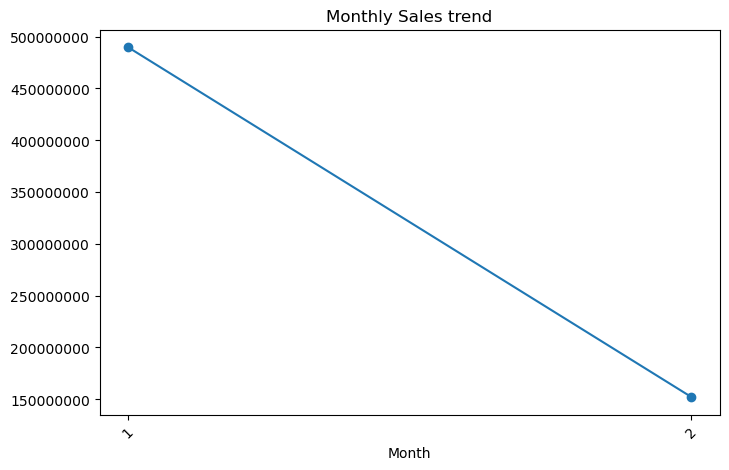

In [47]:
plt.figure(figsize=(8,5))
plt.plot(monthly_sales.index.astype(str),monthly_sales.values,marker='o')

plt.title("Monthly Sales trend") 
plt.xlabel("Month") 
plt.ylabel='Total Sales'

plt.xticks(rotation=45)
plt.ticklabel_format(style='plain',axis='y') 
plt.show()



In [ ]:
#BUSINESS INSIGHTS
# Total Revenue generated is rs.6,42,129,072
# Avg order value is rs.64212.9072
# Top 10% transactions contribute major revenue.
#Shipping cost shows moderate positive correlation with sales
# Sales peak during month 2